### ffn - Funciones Financieras para Python

`ffn` es una librería que contiene muchas funciones útiles para quienes trabajan en finanzas cuantitativas. Se basa en bibliotecas poderosas como Pandas, Numpy y Scipy, proporcionando una amplia gama de utilidades, desde la medición del rendimiento hasta la evaluación de estrategias, graficación y transformaciones comunes de datos.

Si estás buscando un framework completo de backtesting, puedes revisar `bt`. `bt` está construido sobre `ffn` y facilita la creación de backtests de estrategias cuantitativas.

https://pmorissette.github.io/ffn/quick.html

### Introducción Rápida

A continuación, un ejemplo breve de lo que puedes hacer con `ffn`:



In [1]:
pip install ffn

Note: you may need to restart the kernel to use updated packages.


Esto generará un cuadro comparando las acciones de Apple y Microsoft, seguido de las distribuciones de sus retornos. Finalmente, se desplegarán estadísticas de rendimiento detalladas, como la tasa de retorno, la volatilidad y el ratio de Sharpe.



Stat                 aapl        msft
-------------------  ----------  ----------
Start                2010-01-04  2010-01-04
End                  2024-09-12  2024-09-12
Risk-free rate       0.00%       0.00%

Total Return         3351.39%    1728.90%
Daily Sharpe         1.00        0.90
Daily Sortino        1.68        1.51
CAGR                 27.26%      21.88%
Max Drawdown         -43.80%     -37.15%
Calmar Ratio         0.62        0.59

MTD                  -2.72%      2.36%
3m                   4.67%       -3.01%
6m                   28.92%      3.19%
YTD                  16.15%      14.17%
1Y                   27.01%      29.67%
3Y (ann.)            14.85%      13.84%
5Y (ann.)            32.77%      26.58%
10Y (ann.)           25.73%      26.74%
Since Incep. (ann.)  27.26%      21.88%

Daily Sharpe         1.00        0.90
Daily Sortino        1.68        1.51
Daily Mean (ann.)    28.08%      23.11%
Daily Vol (ann.)     28.02%      25.67%
Daily Skew           -0.04       0.04

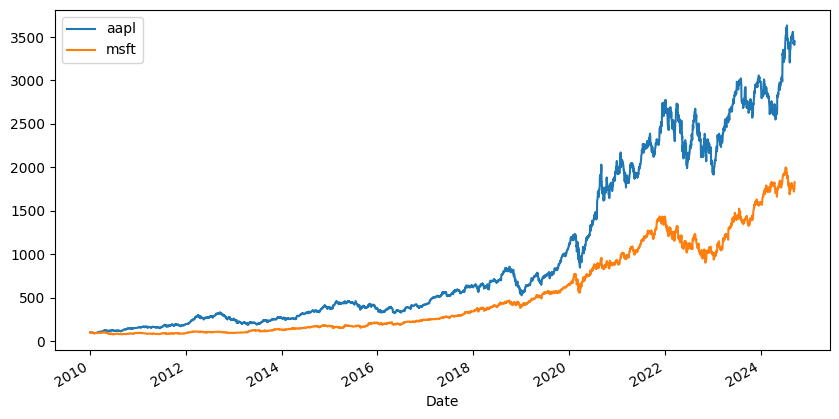

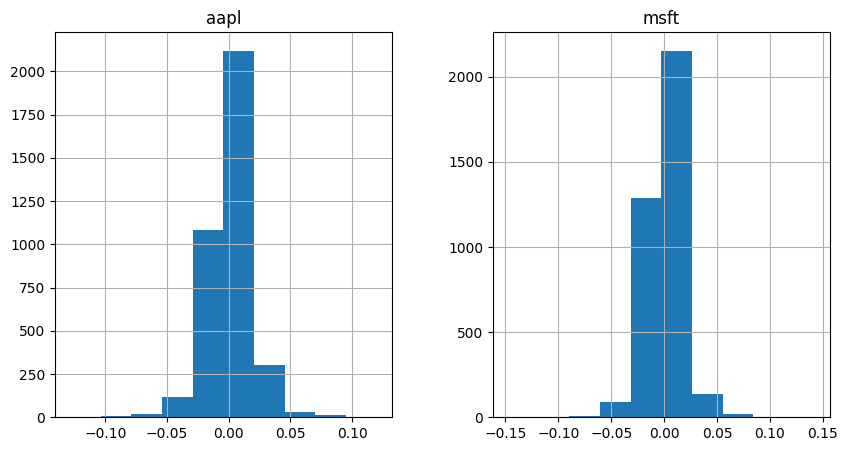

In [56]:
import ffn
import pandas as pd
%matplotlib inline

# Descargar datos de precios desde Yahoo! Finance. Por defecto, se usa el "Adj. Close".
prices = ffn.get('aapl,msft', start='2010-01-01')

# Comparar el rendimiento relativo de cada acción, rebasing para obtener un punto de partida común.
ax = prices.rebase().plot(figsize=(10, 5))

# Visualizar las distribuciones de los retornos.
returns = prices.to_returns().dropna() # Retornos simples
ax = returns.hist(figsize=(10, 5))

# Calcular algunas métricas de rendimiento.
stats = prices.calc_stats()
stats.display()



También puedes graficar las caídas más importantes en cada una de las acciones:



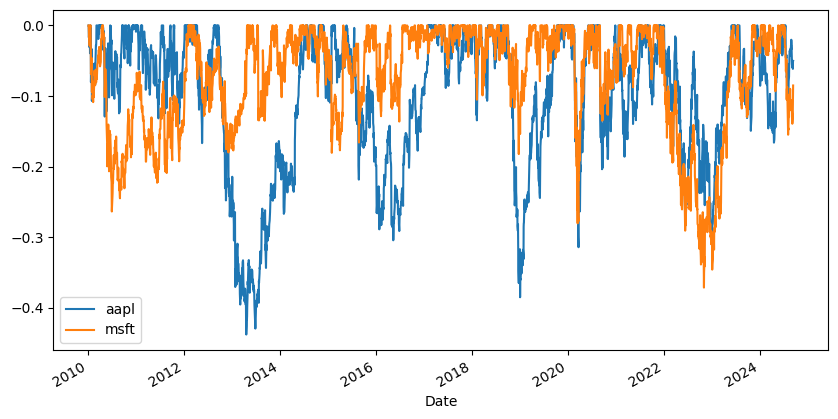

In [43]:
ax = stats.prices.to_drawdown_series().plot(figsize=(10, 5))

### Funciones Básicas

#### Obtener Datos

El método principal para obtener datos es la función `get`. Usa un proveedor de datos externo, por defecto Yahoo! Finance, y devuelve un DataFrame de Pandas con los precios ajustados. Ejemplo:



In [60]:
data = ffn.get('agg,hyg,spy,eem,efa', start='2010-01-01', end='2014-01-01')
print(data.head())

                  agg        hyg        spy        eem        efa
Date                                                             
2010-01-04  69.574379  38.096233  86.580750  31.608854  36.880131
2010-01-05  69.890915  38.276974  86.809914  31.838291  36.912643
2010-01-06  69.850479  38.375957  86.871033  31.904900  37.068668
2010-01-07  69.769669  38.530865  87.237770  31.719879  36.925655
2010-01-08  69.810158  38.591110  87.528061  31.971500  37.218189


Puedes también obtener datos como Open, High, Low y Close de una acción, especificando los campos:


In [61]:
print(ffn.get('aapl:Open,aapl:High,aapl:Low,aapl:Close', start='2010-01-01', end='2014-01-01').head())

            aaplopen  aaplhigh   aapllow  aaplclose
Date                                               
2010-01-04  7.622500  7.660714  7.585000   7.643214
2010-01-05  7.664286  7.699643  7.616071   7.656429
2010-01-06  7.656429  7.686786  7.526786   7.534643
2010-01-07  7.562500  7.571429  7.466071   7.520714
2010-01-08  7.510714  7.571429  7.466429   7.570714


#### Manipulación de Datos

Con los datos en mano, es común en finanzas cuantitativas calcular retornos. Esto se hace fácilmente con `to_returns` o `to_log_returns`.



In [62]:
returns = data.to_log_returns().dropna()
print(returns.head())

                 agg       hyg       spy       eem       efa
Date                                                        
2010-01-05  0.004539  0.004733  0.002643  0.007232  0.000881
2010-01-06 -0.000579  0.002583  0.000704  0.002090  0.004218
2010-01-07 -0.001158  0.004028  0.004213 -0.005816 -0.003866
2010-01-08  0.000580  0.001562  0.003322  0.007901  0.007891
2010-01-11 -0.000773 -0.000893  0.001396 -0.002085  0.008176


Luego, puedes visualizar las distribuciones de los retornos:



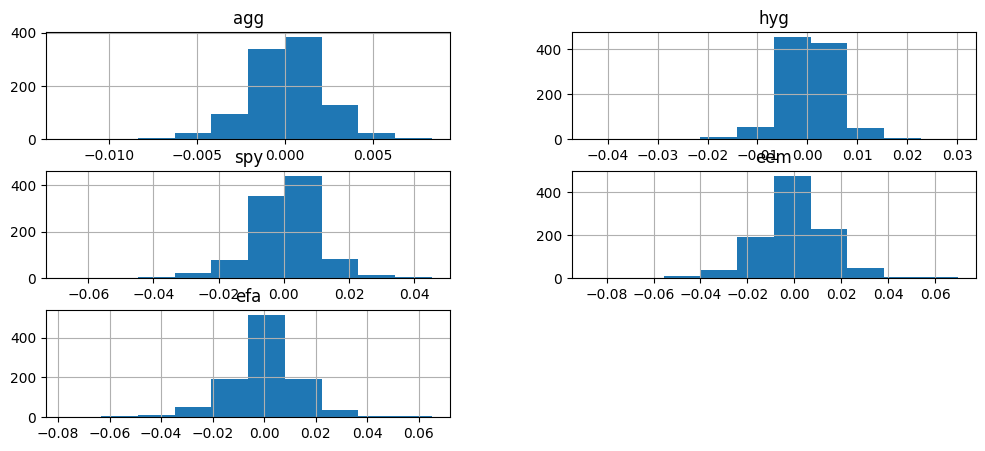

In [63]:
ax = returns.hist(figsize=(12, 5))

Y calcular correlaciones entre los activos:


Con estas funciones, `ffn` facilita enormemente la evaluación y análisis de activos financieros.

In [64]:
returns.corr().as_format('.2f')

,agg,hyg,spy,eem,efa
agg,1.00,-0.12,-0.33,-0.23,-0.29
hyg,-0.12,1.00,0.77,0.75,0.76
spy,-0.33,0.77,1.00,0.88,0.92
eem,-0.23,0.75,0.88,1.00,0.90
efa,-0.29,0.76,0.92,0.90,1.00


Si prefieres visualizar las correlaciones, puedes crear un heatmap:



<module 'matplotlib.pyplot' from 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

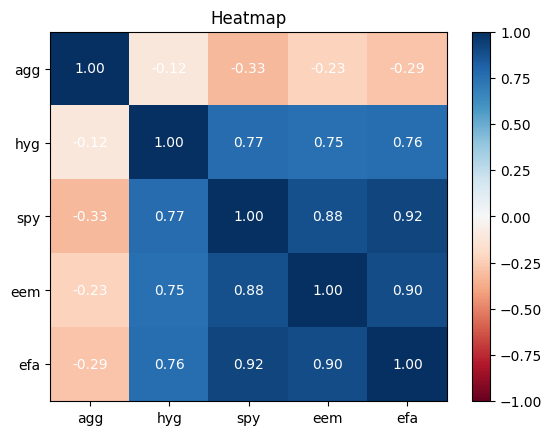

In [65]:
returns.plot_corr_heatmap()

#### Métricas de Rendimiento

Para obtener una vista más completa del rendimiento, puedes usar el método `calc_stats`:



<Axes: title={'center': 'Equity Progression'}, xlabel='Date'>

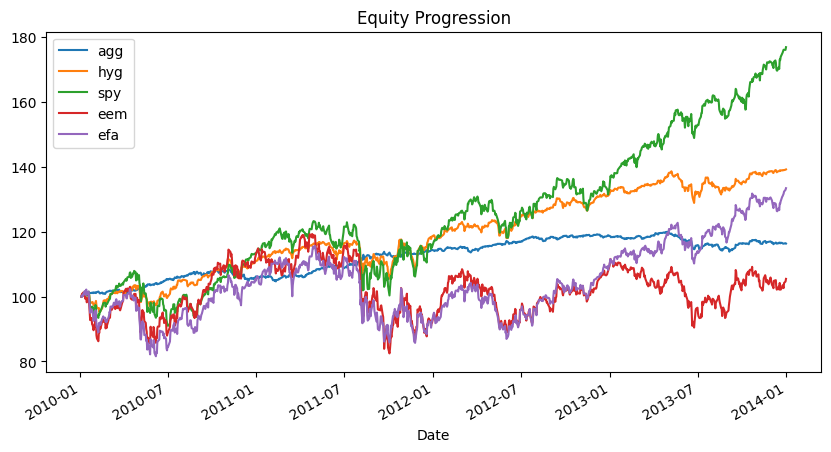

In [67]:
perf = data.calc_stats()
perf.plot(figsize=(10,5))


También puedes desplegar un conjunto amplio de estadísticas para cada activo, como la media diaria, la volatilidad, el ratio de Sharpe y más:


In [51]:
perf.stats

,agg,hyg,spy,eem,efa
start,2010-01-04 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00
end,2013-12-31 00:00:00,2013-12-31 00:00:00,2013-12-31 00:00:00,2013-12-31 00:00:00,2013-12-31 00:00:00
rf,0.0,0.0,0.0,0.0,0.0
total_return,0.163638,0.392212,0.769156,0.054647,0.334297
cagr,0.038723,0.086488,0.15375,0.013427,0.074977
max_drawdown,-0.051429,-0.100557,-0.186055,-0.308693,-0.25861
calmar,0.752934,0.860093,0.826367,0.043498,0.289923
mtd,-0.005568,0.004066,0.025927,-0.004066,0.021761
three_month,0.000199,0.034222,0.105248,0.034784,0.060838
six_month,0.005748,0.058414,0.163183,0.095527,0.181178


In [53]:
perf = pd.DataFrame(data).calc_stats()
perf.set_riskfree_rate(0.055)
perf.display()

Stat                 agg         hyg         spy         eem         efa
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2010-01-04  2010-01-04  2010-01-04  2010-01-04  2010-01-04
End                  2013-12-31  2013-12-31  2013-12-31  2013-12-31  2013-12-31
Risk-free rate       5.50%       5.50%       5.50%       5.50%       5.50%

Total Return         16.36%      39.22%      76.92%      5.46%       33.43%
Daily Sharpe         -0.43       0.37        0.62        -0.04       0.20
Daily Sortino        -0.68       0.57        0.97        -0.07       0.31
CAGR                 3.87%       8.65%       15.37%      1.34%       7.50%
Max Drawdown         -5.14%      -10.06%     -18.61%     -30.87%     -25.86%
Calmar Ratio         0.75        0.86        0.83        0.04        0.29

MTD                  -0.56%      0.41%       2.59%       -0.41%      2.18%
3m                   0.02%       3.42%       10.52%      3.48%       6.08%
6m        

### FUNCIONES

FFN (Financial Functions for Python):

1. ffn.get(): Obtiene datos financieros de varias fuentes (por defecto Yahoo Finance).

2. DataFrame.to_returns(): Calcula los retornos de una serie de precios.

3. DataFrame.to_log_returns(): Calcula los retornos logarítmicos.

4. DataFrame.rebase(): Reajusta los valores a una base común para comparar rendimientos.

5. DataFrame.calc_stats(): Calcula estadísticas de rendimiento para un conjunto de activos.

6. ffn.calc_mean_var_weights(): Calcula los pesos óptimos para una cartera usando el enfoque de media-varianza.

7. DataFrame.calc_ftca(): Implementa el algoritmo de clustering Fast Threshold Clustering Algorithm (FTCA).

8. ffn.core.plot_heatmap(): Genera un mapa de calor, útil para visualizar correlaciones.

9. PerformanceStats.display(): Muestra estadísticas detalladas de rendimiento de un activo o cartera.

10. GroupStats.plot(): Genera gráficos de rendimiento para un grupo de activos.

